# 🌳🌳🌳 Решающие деревья, случайный лес

✅ Реализуйте функцию `find_best_split`, которая должна находить оптимальное разбиение подмножества обучающей выборки.
- При решении задачи регрессии используйте дисперсию подвыборки
- При решении задачи классификации используйте критерий Джини

Функцию`find_best_split` протестируйте на датасете `Boston` из `sklearn`

При решении задания имейте в виду, что под критерием Джини подразумевается такая функция:

$$Q(R) = -\frac {|R_{\ell}|}{|R|}H(R_\ell) -\frac {|R_r|}{|R|}H(R_r) ,$$

где $R$ — множество объектов, попавших в вершину, $R_{\ell}$ и $R_r$ — объекты, попавшие в левое и правое поддеревья,
$H(R) = 1 - p_1^2 - p_0^2$, $p_1$, $p_0$ — доли объектов класса 1 и 0 соответственно.

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое.

In [1]:
from collections import Counter
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv', sep=',')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Загрузка данных
boston = pd.read_csv('dataset.csv', sep=',')

# Разделение на признаки (X) и целевую переменную (y)
X = boston.drop('target', axis=1)  # Все столбцы, кроме 'target'
y = boston['target']               # Только 'target'

# Вывод первых строк признаков
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [ ]:
boston_description = """
**Описание Boston Housing Dataset**

Признаки:
- CRIM: Уровень преступности на душу населения.
- ZN: Доля жилых зон под участки > 25 000 кв.футов.
- INDUS: Доля нежилых коммерческих площадей.
- CHAS: Граничит ли участок с рекой Чарльз (1 — да, 0 — нет).
- NOX: Концентрация оксидов азота (частей на 10 млн).
- RM: Среднее число комнат в жилье.
- AGE: Доля домов, построенных до 1940 г.
- DIS: Взвешенное расстояние до рабочих центров Бостона.
- RAD: Индекс доступности к магистралям.
- TAX: Ставка налога на имущество (на $10 000).
- PTRATIO: Ученик/учитель в городе.
- B: Доля чернокожего населения (в формуле 1000*(Bk - 0.63)^2).
- LSTAT: % населения с низким статусом.
- target: Медианная стоимость дома (в $1000).
"""

print(boston_description)


**Описание Boston Housing Dataset**

Признаки:
- CRIM: Уровень преступности на душу населения.
- ZN: Доля жилых зон под участки > 25 000 кв.футов.
- INDUS: Доля нежилых коммерческих площадей.
- CHAS: Граничит ли участок с рекой Чарльз (1 — да, 0 — нет).
- NOX: Концентрация оксидов азота (частей на 10 млн).
- RM: Среднее число комнат в жилье.
- AGE: Доля домов, построенных до 1940 г.
- DIS: Взвешенное расстояние до рабочих центров Бостона.
- RAD: Индекс доступности к магистралям.
- TAX: Ставка налога на имущество (на $10 000).
- PTRATIO: Ученик/учитель в городе.
- B: Доля чернокожего населения (в формуле 1000*(Bk - 0.63)^2).
- LSTAT: % населения с низким статусом.
- target: Медианная стоимость дома (в $1000).



In [4]:
def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame],
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух соседних (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis/variances: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best/variance_best: оптимальное значение критерия Джини/дисперсии (число)
    """

    n_samples = len(feature_vector)# Получаем количество элементов в feature_vector

    if feature_type == "real":# Обрабатываем случай, когда признак вещественный

        feature_vector = np.array(feature_vector)# Преобразуем признак в numpy массив
        target_vector = np.array(target_vector) # Преобразуем целевую переменную в numpy

        feature_sorted, target_sorted = zip(*sorted(zip(feature_vector, target_vector)))
         # Объединяем feature_vector и target_vector в пары, сортируем эти пары по значениям feature_vector,
        # и затем разделяем обратно на отсортированные feature_sorted и target_sorted.
        # Цель: отсортировать признаки и целевую переменную согласованно, чтобы не потерять связь между ними.
        feature_sorted = np.array(feature_sorted)
        target_sorted = np.array(target_sorted)

        thresholds = []
        for i in range(n_samples - 1):
            if feature_sorted[i] != feature_sorted[i+1]:
                thresholds.append((feature_sorted[i] + feature_sorted[i+1]) / 2)
         # Создаем список порогов.  Порогом является среднее значение между соседними значениями признака,
        # только если эти значения различны.  Это позволяет найти все возможные точки для разбиения.
        thresholds = np.array(thresholds)

        if task == 'regression':
            variances = []
            for threshold in thresholds:
                left_indices = feature_vector <= threshold
                right_indices = feature_vector > threshold
                # Создаем маски (логические массивы), которые показывают, какие элементы feature_vector
                # попадают в левое и правое поддерево относительно текущего порога.
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    variances.append(-np.inf)
                 # Если одно из поддеревьев пустое, то добавляем -inf к variances.
                # Это гарантирует, что порог, приводящий к пустому поддереву, не будет выбран.
                else:
                    left_variance = np.var(target_vector[left_indices])
                    right_variance = np.var(target_vector[right_indices])
                # Вычисляем дисперсию целевой переменной для левого и правого поддерева.

                    variance = - (np.sum(left_indices) / n_samples) * left_variance - (np.sum(right_indices) / n_samples) * right_variance
                    variances.append(variance)
            # Вычисляем взвешенную сумму дисперсий для левого и правого поддерева.
            # Чем меньше variance, тем лучше разбиение.  Знак минус используется, чтобы найти максимум (а не минимум).
            variances = np.array(variances)

            if len(variances) > 0:
                best_index = np.argmax(variances)
                variance_best = variances[best_index]
                threshold_best = thresholds[best_index]
            # Находим индекс порога, который дает максимальное значение variance (минимальную взвешенную сумму дисперсий).
            # Сохраняем лучшее значение variance и соответствующий порог.
            else:
                threshold_best = np.nan
                variance_best = np.nan
                variances = np.array([])
                thresholds = np.array([])

            return (thresholds, variances, threshold_best, variance_best)

        elif task == 'classification': #рассматриваем бинарную классификацию

            ginis = []
            for threshold in thresholds:
                left_indices = feature_vector <= threshold
                right_indices = feature_vector > threshold

                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    ginis.append(-np.inf)
                else:
                    p_left_1 = np.sum(target_vector[left_indices] == 1) / np.sum(left_indices)
                    p_left_0 = np.sum(target_vector[left_indices] == 0) / np.sum(left_indices)
                    H_left = 1 - p_left_1**2 - p_left_0**2

                    p_right_1 = np.sum(target_vector[right_indices] == 1) / np.sum(right_indices)
                    p_right_0 = np.sum(target_vector[right_indices] == 0) / np.sum(right_indices)
                    H_right = 1 - p_right_1**2 - p_right_0**2

                    gini = - (np.sum(left_indices) / n_samples) * H_left - (np.sum(right_indices) / n_samples) * H_right
                    ginis.append(gini)

            ginis = np.array(ginis)

            if len(ginis) > 0:
                best_index = np.argmax(ginis)
                gini_best = ginis[best_index]
                threshold_best = thresholds[best_index]
            else:
                threshold_best = np.nan
                gini_best = np.nan
                ginis = np.array([])
                thresholds = np.array([])

            return (thresholds, ginis, threshold_best, gini_best)




    elif feature_type == "categorical":

          thresholds = np.unique(feature_vector)
          # Порогами являются все уникальные значения категориального признака
          ginis = []

          for threshold in thresholds:
            left_indices = feature_vector == threshold
            right_indices = feature_vector != threshold
            # Создаем маски (логические массивы), которые показывают, какие элементы feature_vector
        # равны текущему порогу (left_indices) и не равны текущему порогу (right_indices).

            if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
              ginis.append(-np.inf)
            # Если одно из поддеревьев пустое, то добавляем -inf к ginis.
        # Это гарантирует, что порог, приводящий к пустому поддереву, не будет выбран.
            else:
              p_left_1 = np.sum(target_vector[left_indices] == 1) / np.sum(left_indices)
              p_left_0 = np.sum(target_vector[left_indices] == 0) / np.sum(left_indices)
              H_left = 1 - p_left_1**2 - p_left_0**2
              # Вычисляем вероятности классов 1 и 0 в левом поддереве,
              #  а затем вычисляем критерий Джини для левого поддерева.

              p_right_1 = np.sum(target_vector[right_indices] == 1) / np.sum(right_indices)
              p_right_0 = np.sum(target_vector[right_indices] == 0) / np.sum(right_indices)
              H_right = 1 - p_right_1**2 - p_right_0**2
              # Вычисляем вероятности классов 1 и 0 в правом поддереве,
              #  а затем вычисляем критерий Джини для правого поддерева.

              gini = - (np.sum(left_indices) / n_samples) * H_left - (np.sum(right_indices) / n_samples) * H_right
              ginis.append(gini)
          ginis = np.array(ginis)
          # Вычисляем взвешенную сумму критериев Джини для левого и правого поддерева.
          # Чем меньше gini, тем лучше разбиение.  Знак минус используется, чтобы найти максимум (а не минимум).

          if len(ginis) > 0:
            best_index = np.argmax(ginis)
            gini_best = ginis[best_index]
            threshold_best = thresholds[best_index]
          else:
            threshold_best = np.nan
            gini_best = np.nan
            ginis = np.array([])
            thresholds = np.array([])

          return (thresholds, ginis, threshold_best, gini_best)





    # if task == 'regression':



    #     return (thresholds, variances, threshold_best, variance_best)



    # elif task == 'classification': #рассматриваем бинарную классификацию



    #     return (thresholds, ginis, threshold_best, gini_best)




In [6]:
thresholds, variances, threshold_best, variance_best = find_best_split(
    X["CRIM"].to_numpy(),
    y,
    task="regression",
    feature_type="real"
)

**Посмотрим на самый оптимальный порог**

In [8]:

thresholds, variances, threshold_best, variance_best = find_best_split(
    X["CRIM"].to_numpy(),
    y.to_numpy(),
    task="regression",
    feature_type="real"
)


print("Threshold_best:", threshold_best)
print("Variance_best:", variance_best)

Threshold_best: 6.68632
Variance_best: -68.08324641384722


**Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `CRIM`.**

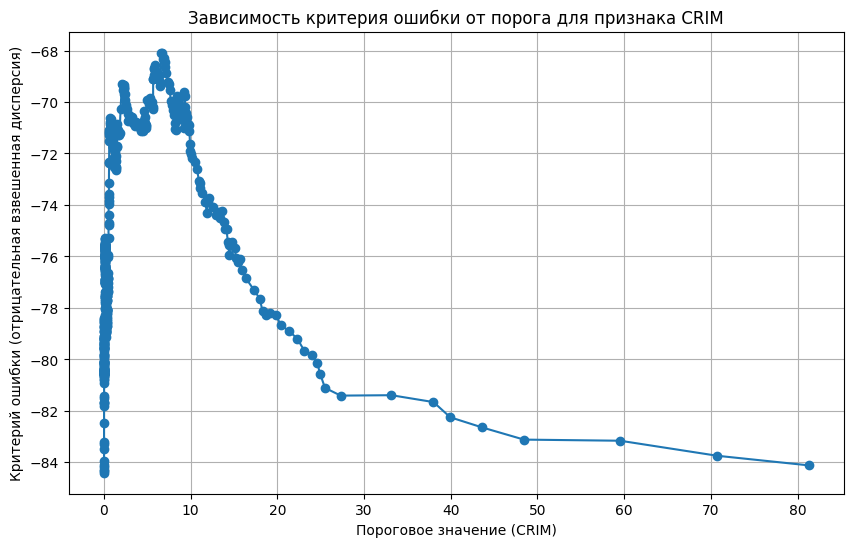

In [9]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(thresholds, variances, marker='o')
plt.xlabel("Пороговое значение (CRIM)")
plt.ylabel("Критерий ошибки (отрицательная взвешенная дисперсия)")
plt.title("Зависимость критерия ошибки от порога для признака CRIM")
plt.grid(True)
plt.show()